In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [30]:
# scenarios, times = np.loadtxt("ThirdFilter.log", delimiter=',', dtype=np.dtype(str))
! awk -F ',' 'NF{NF-=1};1' ThirdFilter.log > scenarios.log
! awk -F ',' '{print $(NF)}' ThirdFilter.log > times_scenarios.log

times = np.loadtxt("times_scenarios.log")
scenarios = np.genfromtxt("scenarios.log", delimiter ='\n', dtype=np.dtype(str))

# Lables for time intervals
labels = ['t < 1', '1 < t < 5', '5 < t < 30', '30 < t < 60', '60 < t < 300', ' t > 300' ]
x_pos = np.arange(len(labels))

In [31]:
def value_repartition(current_array) :
    low_values = ((0 <= current_array) & (current_array < 1)).sum()
    med_low_values = ((1 <= current_array) & (current_array < 5)).sum()
    medium_values = ((5 <= current_array) & (current_array < 30)).sum()
    med_high_values = ((30 <= current_array) & (current_array < 60)).sum()
    high_values = ((60 <= current_array) & (current_array < 300)).sum()
    very_high_values = (300 <= current_array).sum()
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    return count_array

def mean_values(current_array) :
    low_values = (current_array[(0 <= current_array) & (current_array < 1)]).mean()
    if np.isnan(low_values) : low_values = 0
    med_low_values = (current_array[(1 <= current_array) & (current_array < 5)]).mean()
    if np.isnan(med_low_values) : med_low_values = 0
    medium_values = (current_array[(5 <= current_array) & (current_array < 30)]).mean()
    if np.isnan(medium_values) : medium_values = 0
    med_high_values = (current_array[(30 <= current_array) & (current_array < 60)]).mean()
    if np.isnan(med_high_values) : med_high_values = 0
    high_values = (current_array[(60 <= current_array) & (current_array < 300)]).mean()
    if np.isnan(high_values) : high_values = 0
    very_high_values = (current_array[(300 <= current_array)]).mean()
    if np.isnan(very_high_values) : very_high_values = 0
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    print(count_array)
    return count_array

29164.0


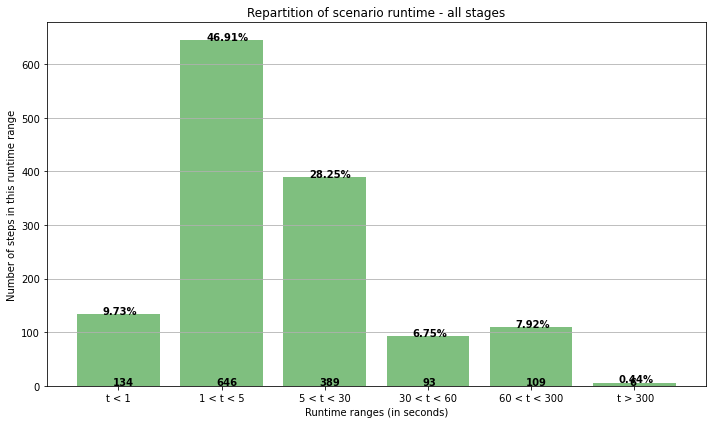

[0.0, 2.2414860681114552, 11.899742930591259, 42.376344086021504, 128.1834862385321, 862.3333333333334]
29164.0


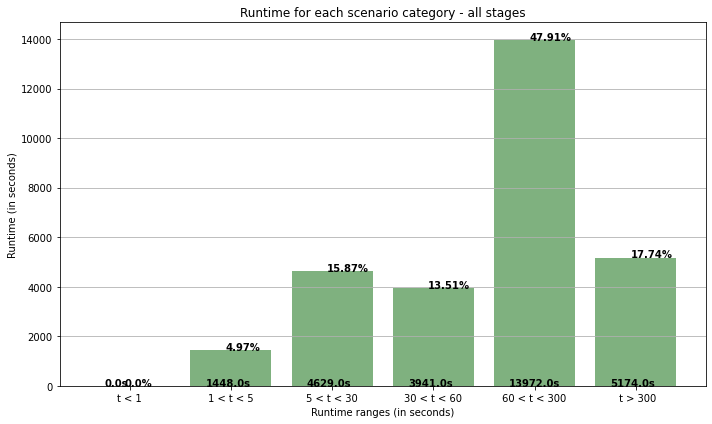

In [49]:
# Array of values being currently worked on
current_array = times
total_values = current_array.size
total_time = current_array.sum()

print(total_time)

# Compute the runtime repartition
occurences = value_repartition(current_array)

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='green')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of scenario runtime - all stages')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[i], str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_scenarios.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgreen')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each scenario category - all stages')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')
    ax2.text((i-1) + 0.95, runtimes[i], str(round(100*v/total_time,2)) + '%', color='black', fontweight='bold')

print(np.sum(runtimes))


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_scenario_runtimes.png')
plt.show()

In [45]:
! awk -F ',' '$(NF) >= 300.0 ' ThirdFilter.log 

Scenario: Disable repositories after installing branch services,700
Scenario: Kill running reposyncs or wait for them to finish,2095
Scenario: Synchronize the repositories in the custom channel for Rocky 8 DVD,514
Scenario: Check the built OS image,692
Scenario: PXE boot the PXE boot minion,631
Scenario: Create an auto installing KVM virtual machine,542


In [48]:
! awk -F ',' '$(NF) < 1.0 ' ThirdFilter.log | grep Scenario

Scenario: The SSH minion is healthy,0
Scenario: The HTTP proxy is working,0
Scenario: The registry with authentication is healthy,0
Scenario: The registry without authentication is healthy,0
Scenario: Detect latest Salt changes on the server,0
Scenario: Create custom pillar to turn off "disable_local_repos",0
Scenario: Wait for Channels generated initial metadata,0
Scenario: Cleanup disable source package syncing,0
Scenario: Log in as admin user,0
Scenario: Create the bootstrap script for the proxy and use it,0
Scenario: Detect latest Salt changes on the proxy,0
Scenario: Check proxy system details,0
Scenario: Cleanup: remove proxy bootstrap scripts,0
Scenario: Install the Retail pattern on the SUSE Manager server,0
Scenario: Enable repositories for installing branch services,0
Scenario: List products,0
Scenario: List all products for SUSE Manager,0
Scenario: Enable RHEL 8 channels for Rocky 8,0
Scenario: Detect latest Salt changes on the Red Hat-like minion,0
Scenario: Add roles,0
Sce